In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. 

**Do not edit this cell.**

In [2]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [3]:
X.shape[0]

1998

## Problem 2

How many features are there in the dataset?


## Solution

In [4]:
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.



## Solution

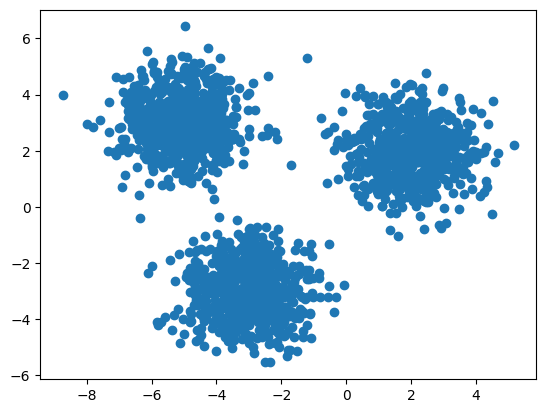

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


(3, 2)


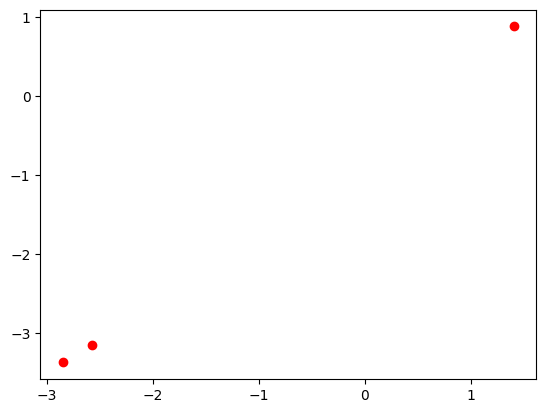

In [9]:
# Enter your code here
initial_cluster_centers = np.array([X[200],X[800],X[1200]])
plt.scatter(initial_cluster_centers[:,0], initial_cluster_centers[:,1], c='r')
print(initial_cluster_centers.shape)

## Problem 4 

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [27]:
# Enter your solution here
def assign_clusters(X: np.ndarray,k:int,cluster_centers:np.ndarray):
    """
    Assigns each point to the cluster center it is closest to.'
    :param X: NxD array of data points
    :param k: number of clusters
    :param cluster_centers: kxD array of cluster centers
    :return: Nx1 array of cluster assignments
    """
    clusters = np.zeros(X.shape[0])
    # find the closest cluster center for each point in X
    distances = np.zeros((X.shape[0],k))
    for i in range(k):
        distances[:,i] = np.linalg.norm(X - cluster_centers[i], axis=1)
    clusters = np.argmin(distances, axis=1)
    return clusters


clusters = assign_clusters(X,3,initial_cluster_centers)
np.mean(clusters)

0.7107107107107107

## Problem 5

Plot the data points, with different color for different clusters.


## Solution

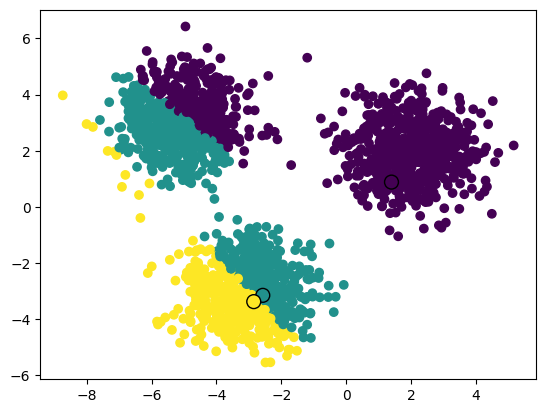

In [33]:
plt.scatter(X[:,0], X[:,1], c=clusters)
#plot initial cluster centers with same color as the cluster centers with black outline and larger size
plt.scatter(initial_cluster_centers[:,0], initial_cluster_centers[:,1], c=[0,1,2], edgecolors='k', s=100)
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [38]:
def compute_cluster_centers(X: np.ndarray,k:int,clusters:np.ndarray):
    """
    Computes the cluster centers for the given clusters.
    :param X: NxD array of data points
    :param k: number of clusters
    :param clusters: Nx1 array of cluster assignments
    :return: kxD array of cluster centers
    """
    cluster_centers = np.zeros((k,X.shape[1]))
    for i in range(k):
        cluster_centers[i] = np.mean(X[clusters==i], axis=0)
    new_distances = np.zeros((X.shape[0],k))
    for i in range(k):
        new_distances[:,i] = np.linalg.norm(X - cluster_centers[i], axis=1)
    new_clusters = np.argmin(new_distances, axis=1)
    return cluster_centers, new_clusters

cluster_centers, new_clusters = compute_cluster_centers(X,3,clusters)
print(np.mean(cluster_centers, axis=0))

[-2.55251646 -0.19225194]


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

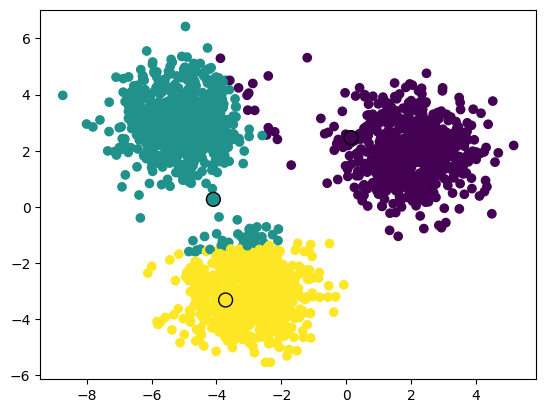

In [39]:
# Enter your code here
plt.scatter(X[:,0], X[:,1], c=new_clusters)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=[0,1,2], edgecolors='k', s=100)


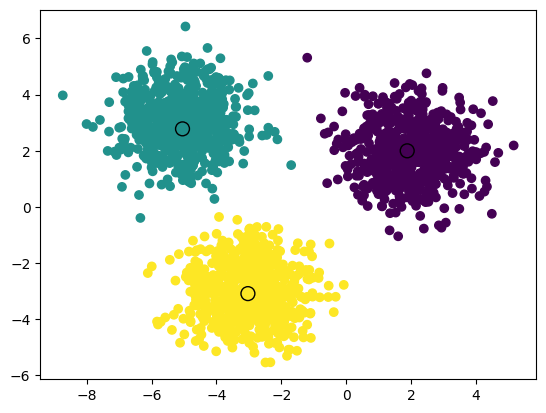

In [40]:
cluster_centers, new_clusters = compute_cluster_centers(X,3,new_clusters)
plt.scatter(X[:,0], X[:,1], c=new_clusters)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=[0,1,2], edgecolors='k', s=100)
plt.show()

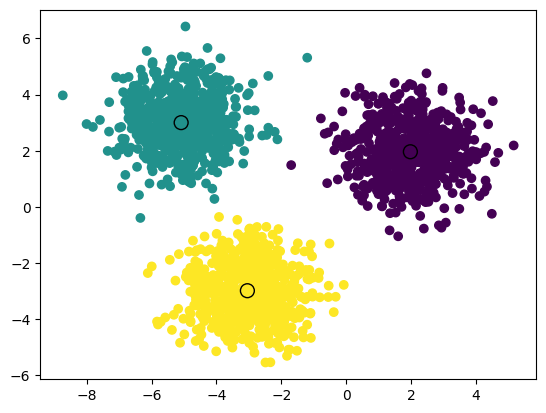

In [41]:
cluster_centers, new_clusters = compute_cluster_centers(X,3,new_clusters)
plt.scatter(X[:,0], X[:,1], c=new_clusters)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=[0,1,2], edgecolors='k', s=100)
plt.show()

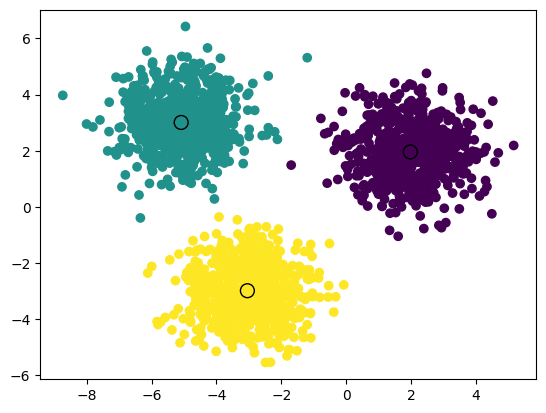

In [42]:
cluster_centers, new_clusters = compute_cluster_centers(X,3,new_clusters)
plt.scatter(X[:,0], X[:,1], c=new_clusters)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=[0,1,2], edgecolors='k', s=100)
plt.show()